<h1>Muhammad Mehroz </h1>
<H2> FA20-BSE-071</h2>
<br> DataScience Assignment 3
Data Set Name : Significant Earthquakes, 1965-2016
<br> Link : https://www.kaggle.com/datasets/usgs/earthquake-database


Importing important libraries

In [2]:
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt
import seaborn as sns
import re 
import folium

Feteching the data from the csv file name eathquakedata.csv

In [3]:
data_read = pd.read_csv("EarthQuakeData.csv")

In [4]:
data_read.head()

Date      Time  Latitude  Longitude        Type  Depth  Depth Error  \
0  01/02/1965  13:44:18    19.246    145.616  Earthquake  131.6          NaN   
1  01/04/1965  11:29:49     1.863    127.352  Earthquake   80.0          NaN   
2  01/05/1965  18:05:58   -20.579   -173.972  Earthquake   20.0          NaN   
3  01/08/1965  18:49:43   -59.076    -23.557  Earthquake   15.0          NaN   
4  01/09/1965  13:32:50    11.938    126.427  Earthquake   15.0          NaN   

   Depth Seismic Stations  Magnitude Magnitude Type  ...  \
0                     NaN        6.0             MW  ...   
1                     NaN        5.8             MW  ...   
2                     NaN        6.2             MW  ...   
3                     NaN        5.8             MW  ...   
4                     NaN        5.8             MW  ...   

   Magnitude Seismic Stations  Azimuthal Gap  Horizontal Distance  \
0                         NaN            NaN                  NaN   
1                         NaN            NaN                  NaN   
2                         NaN            NaN                  NaN   
3                         NaN            NaN                  NaN   
4                         NaN            NaN                  NaN   

   Horizontal Error  Root Mean Square            ID  Source Location Source  \
0               NaN               NaN  ISCGEM860706  ISCGEM          ISCGEM   
1               NaN               NaN  ISCGEM860737  ISCGEM          ISCGEM   
2               NaN               NaN  ISCGEM860762  ISCGEM          ISCGEM   
3               NaN               NaN  ISCGEM860856  ISCGEM          ISCGEM   
4               NaN               NaN  ISCGEM860890  ISCGEM          ISCGEM   

  Magnitude Source     Status  
0           ISCGEM  Automatic  
1           ISCGEM  Automatic  
2           ISCGEM  Automatic  
3           ISCGEM  Automatic  
4           ISCGEM  Automatic  

[5 rows x 21 columns]

Droping unimportant columns

In [5]:
data_read = data_read.drop(['Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'Source', 'Location Source', 'Magnitude Source', 'Status' ,'Depth Error',
       'Depth Seismic Stations'] ,axis = 1)

after dropping some columns


In [6]:
data_read.columns
data_read.head()

Date      Time  Latitude  Longitude        Type  Depth  Magnitude  \
0  01/02/1965  13:44:18    19.246    145.616  Earthquake  131.6        6.0   
1  01/04/1965  11:29:49     1.863    127.352  Earthquake   80.0        5.8   
2  01/05/1965  18:05:58   -20.579   -173.972  Earthquake   20.0        6.2   
3  01/08/1965  18:49:43   -59.076    -23.557  Earthquake   15.0        5.8   
4  01/09/1965  13:32:50    11.938    126.427  Earthquake   15.0        5.8   

  Magnitude Type            ID  
0             MW  ISCGEM860706  
1             MW  ISCGEM860737  
2             MW  ISCGEM860762  
3             MW  ISCGEM860856  
4             MW  ISCGEM860890

Creating sql lite database and table

In [7]:
conn = sql.connect("databasefile.db")
c = conn.cursor()

Making the First Table 
name <br> First_Table
<br> Contains data of <br> Date , Time , ID(Primary key) , Longitude , Latitude 

In [33]:
c.execute("""
Create table First_Table( ID text primary key,Date text, Time text , Latitude float , Logitude float  )""")

Inserting data in the fist table <br>
Iterating through the dataframe columns and then storing in the tables 

In [34]:
for r in data_read.itertuples():
    #print(r[4])
    insert = f"Insert into First_Table(ID , Date , Time , Latitude , Logitude) values('{r[9]}','{r[1]}' ,'{r[2]}','{r[3]}','{r[4]}')"
    c.execute(insert)

Printing data from the First_Table

In [35]:
for r in c.execute("Select * from First_Table"):
    print(r)

('ISCGEM860706', '01/02/1965', '13:44:18', 19.246, 145.616)
('ISCGEM860737', '01/04/1965', '11:29:49', 1.863, 127.352)
('ISCGEM860762', '01/05/1965', '18:05:58', -20.579, -173.972)
('ISCGEM860856', '01/08/1965', '18:49:43', -59.076, -23.557)
('ISCGEM860890', '01/09/1965', '13:32:50', 11.938, 126.427)
('ISCGEM860922', '01/10/1965', '13:36:32', -13.405, 166.629)
('ISCGEM861007', '01/12/1965', '13:32:25', 27.357, 87.867)
('ISCGEM861111', '01/15/1965', '23:17:42', -13.309, 166.212)
('ISCGEMSUP861125', '01/16/1965', '11:32:37', -56.452, -27.043)
('ISCGEM861148', '01/17/1965', '10:43:17', -24.563, 178.487)
('ISCGEM861155', '01/17/1965', '20:57:41', -6.807, 108.988)
('ISCGEM861299', '01/24/1965', '00:11:17', -2.608, 125.952)
('ISCGEM861461', '01/29/1965', '09:35:30', 54.636, 161.703)
('ISCGEM859136', '02/01/1965', '05:27:06', -18.697, -177.864)
('ISCGEM859164', '02/02/1965', '15:56:51', 37.523, 73.251)
('ISCGEM859200', '02/04/1965', '03:25:00', -51.84, 139.741)
('OFFICIAL19650204050122_30', '

Now Commiting the 1st table

In [36]:
conn.commit()

Making 2nd Table Named: Second_Table
Contains data about <br> Type	Depth	Magnitude	Magnitude Type

In [38]:
c.execute("""
Create table Second_Table( Type text, Depth float, Magnitude float, Magnitude_Type  text, ID_as_FK text, foreign key(ID_as_FK) references First_Table(ID)  )""")

Inserting the data into 2nd Table

In [39]:
for r in data_read.itertuples():
    #print(r[7])
    insert = f"Insert into Second_Table(Type , Depth,Magnitude , Magnitude_Type, ID_as_FK) values('{r[5]}',{r[6]},{r[7]},'{r[8]}','{r[9]}')"
    c.execute(insert)

In [40]:
for r in c.execute("Select * from Second_Table"):
    print(r)

('Earthquake', 131.6, 6.0, 'MW', 'ISCGEM860706')
('Earthquake', 80.0, 5.8, 'MW', 'ISCGEM860737')
('Earthquake', 20.0, 6.2, 'MW', 'ISCGEM860762')
('Earthquake', 15.0, 5.8, 'MW', 'ISCGEM860856')
('Earthquake', 15.0, 5.8, 'MW', 'ISCGEM860890')
('Earthquake', 35.0, 6.7, 'MW', 'ISCGEM860922')
('Earthquake', 20.0, 5.9, 'MW', 'ISCGEM861007')
('Earthquake', 35.0, 6.0, 'MW', 'ISCGEM861111')
('Earthquake', 95.0, 6.0, 'MW', 'ISCGEMSUP861125')
('Earthquake', 565.0, 5.8, 'MW', 'ISCGEM861148')
('Earthquake', 227.9, 5.9, 'MW', 'ISCGEM861155')
('Earthquake', 20.0, 8.2, 'MW', 'ISCGEM861299')
('Earthquake', 55.0, 5.5, 'MW', 'ISCGEM861461')
('Earthquake', 482.9, 5.6, 'MW', 'ISCGEM859136')
('Earthquake', 15.0, 6.0, 'MW', 'ISCGEM859164')
('Earthquake', 10.0, 6.1, 'MW', 'ISCGEM859200')
('Earthquake', 30.3, 8.7, 'MW', 'OFFICIAL19650204050122_30')
('Earthquake', 30.0, 6.0, 'MW', 'ISCGEMSUP859215')
('Earthquake', 25.0, 5.7, 'MW', 'ISCGEM859221')
('Earthquake', 25.0, 5.8, 'MW', 'ISCGEM859222')
('Earthquake', 25

Commiting the 2nd Table

In [41]:
conn.commit()

<h1>Creating Inner Join

In [8]:
for i in c.execute( "select First_Table.Date , First_Table.Time , First_Table.Latitude , First_Table.Logitude, Second_Table.Type , Second_Table.Depth, Second_Table.Magnitude , Second_Table.Magnitude_Type from First_Table inner join Second_Table on Second_Table.ID_as_FK = First_Table.ID"):
    print(i)


('01/02/1965', '13:44:18', 19.246, 145.616, 'Earthquake', 131.6, 6.0, 'MW')
('01/04/1965', '11:29:49', 1.863, 127.352, 'Earthquake', 80.0, 5.8, 'MW')
('01/05/1965', '18:05:58', -20.579, -173.972, 'Earthquake', 20.0, 6.2, 'MW')
('01/08/1965', '18:49:43', -59.076, -23.557, 'Earthquake', 15.0, 5.8, 'MW')
('01/09/1965', '13:32:50', 11.938, 126.427, 'Earthquake', 15.0, 5.8, 'MW')
('01/10/1965', '13:36:32', -13.405, 166.629, 'Earthquake', 35.0, 6.7, 'MW')
('01/12/1965', '13:32:25', 27.357, 87.867, 'Earthquake', 20.0, 5.9, 'MW')
('01/15/1965', '23:17:42', -13.309, 166.212, 'Earthquake', 35.0, 6.0, 'MW')
('01/16/1965', '11:32:37', -56.452, -27.043, 'Earthquake', 95.0, 6.0, 'MW')
('01/17/1965', '10:43:17', -24.563, 178.487, 'Earthquake', 565.0, 5.8, 'MW')
('01/17/1965', '20:57:41', -6.807, 108.988, 'Earthquake', 227.9, 5.9, 'MW')
('01/24/1965', '00:11:17', -2.608, 125.952, 'Earthquake', 20.0, 8.2, 'MW')
('01/29/1965', '09:35:30', 54.636, 161.703, 'Earthquake', 55.0, 5.5, 'MW')
('02/01/1965', '0

<h2>Now Storing the Data OF inner join in dataframe

In [9]:
frame_made_up_of_inner_join = pd.read_sql_query( "select First_Table.Date , First_Table.Time , First_Table.Latitude , First_Table.Logitude, Second_Table.Type , Second_Table.Depth, Second_Table.Magnitude , Second_Table.Magnitude_Type from First_Table inner join Second_Table on Second_Table.ID_as_FK = First_Table.ID", conn )
frame_made_up_of_inner_join

Date      Time  Latitude  Logitude        Type   Depth  \
0      01/02/1965  13:44:18   19.2460  145.6160  Earthquake  131.60   
1      01/04/1965  11:29:49    1.8630  127.3520  Earthquake   80.00   
2      01/05/1965  18:05:58  -20.5790 -173.9720  Earthquake   20.00   
3      01/08/1965  18:49:43  -59.0760  -23.5570  Earthquake   15.00   
4      01/09/1965  13:32:50   11.9380  126.4270  Earthquake   15.00   
...           ...       ...       ...       ...         ...     ...   
23407  12/28/2016  08:22:12   38.3917 -118.8941  Earthquake   12.30   
23408  12/28/2016  09:13:47   38.3777 -118.8957  Earthquake    8.80   
23409  12/28/2016  12:38:51   36.9179  140.4262  Earthquake   10.00   
23410  12/29/2016  22:30:19   -9.0283  118.6639  Earthquake   79.00   
23411  12/30/2016  20:08:28   37.3973  141.4103  Earthquake   11.94   

       Magnitude Magnitude_Type  
0            6.0             MW  
1            5.8             MW  
2            6.2             MW  
3            5.8             MW  
4            5.8             MW  
...          ...            ...  
23407        5.6             ML  
23408        5.5             ML  
23409        5.9            MWW  
23410        6.3            MWW  
23411        5.5             MB  

[23412 rows x 8 columns]

<h2>Visulization of Data

<H1>Graph between Number of Occurances and Magnitude</H1>
<br>this graph shows how many earthquakes happens with certian magnitude

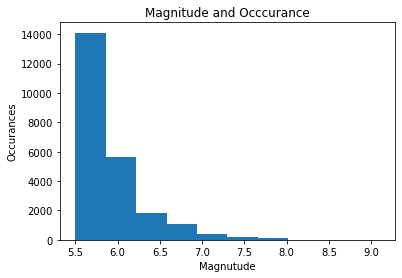

In [50]:
plt.hist(frame_made_up_of_inner_join["Magnitude"])
plt.xlabel("Magnutude")
plt.ylabel("Occurances")
plt.title("Magnitude and Occcurance")
plt.show()

<h1>Graph between Magnitude Type and Frequence</h1>
<br>This gives us the pattren that certain types of earthquakes occures in the world

** Magnitude Types **
ML -> Local Magnitude
Ms-> Surface-Wave-Magnitude
MB -> Body-wave-Magnitude
MW -> Momentum Magnitude


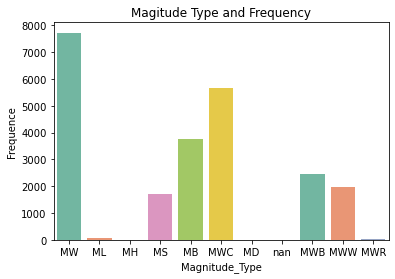

In [52]:
sns.countplot(x='Magnitude_Type',data=frame_made_up_of_inner_join,palette="Set2")
plt.ylabel("Frequence")
plt.title("Magitude Type and Frequency")
print("** Magnitude Types **")
print("ML -> Local Magnitude\nMs-> Surface-Wave-Magnitude\nMB -> Body-wave-Magnitude\nMW -> Momentum Magnitude")
plt.show()

Magitude Types are the technologies / ways to meause the magnitude of the earthquakes.<br>
The above graph shows that Momentum Magnitude records the highest number of earthquakes.

Making a new colum of years for better analysis
using regex

In [12]:
import datetime
frame_made_up_of_inner_join['d'] =frame_made_up_of_inner_join['Date'].apply(lambda x :pd.to_datetime(x))
frame_made_up_of_inner_join['year'] = frame_made_up_of_inner_join['d'].apply(lambda x:str(x).split('-')[0])
frame_made_up_of_inner_join

Date      Time  Latitude  Logitude        Type   Depth  \
0      01/02/1965  13:44:18   19.2460  145.6160  Earthquake  131.60   
1      01/04/1965  11:29:49    1.8630  127.3520  Earthquake   80.00   
2      01/05/1965  18:05:58  -20.5790 -173.9720  Earthquake   20.00   
3      01/08/1965  18:49:43  -59.0760  -23.5570  Earthquake   15.00   
4      01/09/1965  13:32:50   11.9380  126.4270  Earthquake   15.00   
...           ...       ...       ...       ...         ...     ...   
23407  12/28/2016  08:22:12   38.3917 -118.8941  Earthquake   12.30   
23408  12/28/2016  09:13:47   38.3777 -118.8957  Earthquake    8.80   
23409  12/28/2016  12:38:51   36.9179  140.4262  Earthquake   10.00   
23410  12/29/2016  22:30:19   -9.0283  118.6639  Earthquake   79.00   
23411  12/30/2016  20:08:28   37.3973  141.4103  Earthquake   11.94   

       Magnitude Magnitude_Type                    d  year  
0            6.0             MW  1965-01-02 00:00:00  1965  
1            5.8             MW  1965-01-04 00:00:00  1965  
2            6.2             MW  1965-01-05 00:00:00  1965  
3            5.8             MW  1965-01-08 00:00:00  1965  
4            5.8             MW  1965-01-09 00:00:00  1965  
...          ...            ...                  ...   ...  
23407        5.6             ML  2016-12-28 00:00:00  2016  
23408        5.5             ML  2016-12-28 00:00:00  2016  
23409        5.9            MWW  2016-12-28 00:00:00  2016  
23410        6.3            MWW  2016-12-29 00:00:00  2016  
23411        5.5             MB  2016-12-30 00:00:00  2016  

[23412 rows x 10 columns]

Text(0.5, 1.0, 'Number of EarthQuales in Each Year')

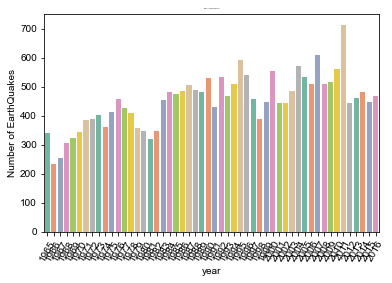

In [13]:
f = plt.Figure(figsize=(500,100))
sns.countplot(x = 'year',data=frame_made_up_of_inner_join,palette='Set2')
sns.set(font_scale = 0.05)
ax =f.add_subplot(1,1,1,)
plt.xticks(rotation = 60)
plt.ylabel("Number of EarthQuakes")
plt.title("Number of EarthQuales in Each Year")

Above graph gives the number of earthquakes in each years

EarthQuakes Per YEar since 1965 to 2016

In [24]:
# getting the unique years 
x = frame_made_up_of_inner_join['year'].unique()
y = frame_made_up_of_inner_join['year'].value_counts()
count = []
# all this is to store the value of earthquake for each year
for i in range(len(x)):
    key = x[i]             
    count.append(y[key])


52 
 52


<h2>Making an Scatter plot to get an idea how many earthquakes occurs in each year

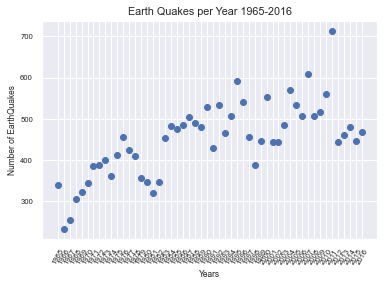

In [44]:
f = plt.Figure(figsize=(900,100))
plt.scatter(x,count)
sns.set(font_scale = 0.9)
plt.xlabel("Years")
plt.xticks(rotation = 60)
#a = f.add_subplot(1,1,1)
plt.ylabel("Number of EarthQuakes")
plt.title("Earth Quakes per Year 1965-2016")
plt.show()

This Graph shows that 2011 got the heighest EarthQuakes

<h3>Creating Graph on the basis of magnitude

Defining the Class to each Magnitude 
* Disastrous -> M>=8
* Major -> 7<= M <7.9
* Strong -> 6<= M <6.9
* Moderate -> 5.5 <= M <5.9


In [51]:

frame_made_up_of_inner_join.loc[frame_made_up_of_inner_join['Magnitude'] >=8, 'Class'] = 'Disastrous'
frame_made_up_of_inner_join.loc[ (frame_made_up_of_inner_join['Magnitude'] >= 7) & (frame_made_up_of_inner_join['Magnitude'] < 7.9), 'Class'] = 'Major'
frame_made_up_of_inner_join.loc[ (frame_made_up_of_inner_join['Magnitude'] >= 6) & (frame_made_up_of_inner_join['Magnitude'] < 6.9), 'Class'] = 'Strong'
frame_made_up_of_inner_join.loc[ (frame_made_up_of_inner_join['Magnitude'] >= 5.5) & (frame_made_up_of_inner_join['Magnitude'] < 5.9), 'Class'] = 'Moderate'


frame_made_up_of_inner_join.Class

0          Strong
1        Moderate
2          Strong
3        Moderate
4        Moderate
           ...   
23407    Moderate
23408    Moderate
23409         NaN
23410      Strong
23411    Moderate
Name: Class, Length: 23412, dtype: object

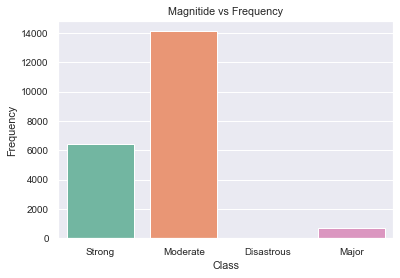

In [57]:
sns.countplot(x = "Class",data=frame_made_up_of_inner_join,palette='Set2')
plt.ylabel("Frequency")
plt.title("Magnitide vs Frequency")
plt.show()

Upper Graph shows that most of the EarthQuakes were Moderate in MAgnitude

<h2>Graph Represent Areas which hit by Earthquake with Magitube greater than 6.9

In [62]:
#filtering the dataframe
dataset_M_5 = frame_made_up_of_inner_join[frame_made_up_of_inner_join['Magnitude']>6.9]
dataset_M_5

Date      Time  Latitude  Logitude        Type   Depth  \
11     01/24/1965  00:11:17   -2.6080  125.9520  Earthquake   20.00   
16     02/04/1965  05:01:22   51.2510  178.7150  Earthquake   30.30   
26     02/04/1965  08:40:44   51.4430  179.6050  Earthquake   30.00   
62     02/23/1965  22:11:47  -25.6330  -70.6790  Earthquake   35.00   
87     03/14/1965  15:53:07   36.4050   70.7240  Earthquake  207.80   
...           ...       ...       ...       ...         ...     ...   
23233  09/01/2016  16:37:57  -37.3586  179.1461  Earthquake   19.00   
23326  11/13/2016  11:02:56  -42.7358  173.0499  Earthquake   15.22   
23369  12/08/2016  17:38:46  -10.6787  161.3214  Earthquake   40.00   
23386  12/17/2016  10:51:10   -4.5049  153.5216  Earthquake   94.54   
23403  12/25/2016  14:22:27  -43.4029  -73.9395  Earthquake   38.00   

       Magnitude Magnitude_Type                    d  year       Class  
11           8.2             MW  1965-01-24 00:00:00  1965  Disastrous  
16           8.7             MW  1965-02-04 00:00:00  1965  Disastrous  
26           7.3             MW  1965-02-04 00:00:00  1965       Major  
62           7.0             MW  1965-02-23 00:00:00  1965       Major  
87           7.4             MW  1965-03-14 00:00:00  1965       Major  
...          ...            ...                  ...   ...         ...  
23233        7.0            MWW  2016-09-01 00:00:00  2016       Major  
23326        7.8            MWW  2016-11-13 00:00:00  2016       Major  
23369        7.8            MWW  2016-12-08 00:00:00  2016       Major  
23386        7.9            MWW  2016-12-17 00:00:00  2016         NaN  
23403        7.6            MWW  2016-12-25 00:00:00  2016       Major  

[738 rows x 11 columns]

In [68]:
#making graph using folium
world_map = folium.Map(location=[30.3753, 69.3451],zoom_start=5)

for date, lat, lon , mag ,Depth in zip(list(frame_made_up_of_inner_join["Date"]),list(frame_made_up_of_inner_join["Latitude"]),
list(frame_made_up_of_inner_join["Logitude"]) , list(frame_made_up_of_inner_join['Magnitude']), list(frame_made_up_of_inner_join['Depth'])  ):

    # for creating circles
    folium.CircleMarker(location=[lat,lon],
                        radius = 5,
                        color = 'red',
                        fill = True,
                        fill_color = 'red').add_to(world_map)

    
    folium.Marker(location=[lat , lon],
                    #adding info
                 popup = folium.Popup(('<strong><b>Date :'+str(date)+'</strong><br>'+
                 '<strong><b>Magnitude :'+str(mag)+'</striong><br>'+
                 '<strong><font color = green>Depth :</font>'+str(Depth)+'km<striong><br>'),max_width = 200)).add_to(world_map)

world_map

This graph will help us to know that which areas are affected by most of the earthquakes. According to this graph most of the earthquakes happened in the region of Japan , Indonesia , Phillipines and Thiland

Now Closing the Connection to the DataBase

In [71]:
conn.close

<function Connection.close>

<h1>The END